In [21]:
"""У нас есть две csv таблицы с данными нужно свести их по полю post_id и 
сохранить в новую таблицу дата фрейм. Из первой таблицы берем 
поле tag а из второй поле text. В конце в новой таблице должно быть 3 поля post_id, tag, text.
 В конце соханить новую таблицу в csv файл."""

import pandas as pd
import tqdm 

# Читаем данные из файлов
data1 = pd.read_csv('./Project/tags.csv')
data2 = pd.read_csv('./Project/posts.csv')

# Объединяем данные по полю post_id
data_union = pd.merge(data1, data2, on='post_id')

#Дропаем все столбцы кроме post_id, tag, text
data_union = data_union[['post_id', 'tag', 'text']]

#Теперь для каждого уникального post_id соберем все теги и тексты в однин список
data_union = data_union.groupby('post_id').agg({'tag': list, 'text': list}).reset_index()

In [22]:
data_union

,post_id,tag,text
0,1,"[хабрахаб, wiki, FAQ, ЧАВО, механизм, движок]",[Привет!\n\nДля сборника ответов на Часто Зада...
1,2,"[ошибки, баги, bugs, error, warning]","[Кроме неработающих и отсутствующих страниц, о..."
2,3,[RSS],[Какими службами пользуетесь для чтения RSS-по...
3,4,"[Google, Маслов, Сокур и партнеры, PR, сопрово...","[Насколько я знаю, Google выбрал агентство «Ма..."
4,6,"[хабрахабр, подкасты, mp3, контент, тексты]",[Мы планируем добавить в раздел «тексты» возмо...
...,...,...,...
232122,500390,"[локализация, it-компании, localization]",[\n\nПандемия COVID-19 и вызванные ею кризисны...
232123,500394,"[Apple, MacBook Pro]",[\nКомпания Apple представила обновлённый 13-д...
232124,500396,"[информационная безопасность, nfc-метки, скуд]",[Всем доброго времени суток. Начну с предыстор...
232125,500398,"[общение, нетворкинг, социализация, обучение, ...","[\n\nЛучшие идеи рождаются в курилках, это все..."


In [23]:
#Проверим сколько в data_union строк, где в тегах есть хотя бы один элемент являющийся отдельным словом, а не строкой из нескольких слов
#Выведем series с булевыми значениями
word_tag = data_union['tag'].apply(lambda x: any([len(str(i).split()) == 1 for i in x]))
data_union[word_tag]

,post_id,tag,text
0,1,"[хабрахаб, wiki, FAQ, ЧАВО, механизм, движок]",[Привет!\n\nДля сборника ответов на Часто Зада...
1,2,"[ошибки, баги, bugs, error, warning]","[Кроме неработающих и отсутствующих страниц, о..."
2,3,[RSS],[Какими службами пользуетесь для чтения RSS-по...
3,4,"[Google, Маслов, Сокур и партнеры, PR, сопрово...","[Насколько я знаю, Google выбрал агентство «Ма..."
4,6,"[хабрахабр, подкасты, mp3, контент, тексты]",[Мы планируем добавить в раздел «тексты» возмо...
...,...,...,...
232121,500386,"[разработка под ios, swiftui]","[Доброго всем времени суток! С вами я, Анна Жа..."
232122,500390,"[локализация, it-компании, localization]",[\n\nПандемия COVID-19 и вызванные ею кризисны...
232123,500394,"[Apple, MacBook Pro]",[\nКомпания Apple представила обновлённый 13-д...
232124,500396,"[информационная безопасность, nfc-метки, скуд]",[Всем доброго времени суток. Начну с предыстор...


In [24]:
#Проверим сколько в data_union строк, где все теги - отдельные слова, а не строки из нескольких слов
#Выведем series с булевыми значениями
word_tag_all = data_union['tag'].apply(lambda x: all([len(str(i).split()) == 1 for i in x]))
data_union[word_tag_all]

,post_id,tag,text
0,1,"[хабрахаб, wiki, FAQ, ЧАВО, механизм, движок]",[Привет!\n\nДля сборника ответов на Часто Зада...
1,2,"[ошибки, баги, bugs, error, warning]","[Кроме неработающих и отсутствующих страниц, о..."
2,3,[RSS],[Какими службами пользуетесь для чтения RSS-по...
4,6,"[хабрахабр, подкасты, mp3, контент, тексты]",[Мы планируем добавить в раздел «тексты» возмо...
5,7,"[логин, login]","[У меня такое ощущение, что logout время от вр..."
...,...,...,...
232096,500332,[java],[\n\nВышла совершенно новая библиотека Enriche...
232099,500338,"[философия, дзен]","[Привет, Хабр! Представляю вашему вниманию пер..."
232103,500346,"[dns, kubernetes, conntrack, postmortem, devops]",[Прим. перев.: это перевод публичного постморт...
232112,500364,"[Moodle, BigBlueButton, Zimbra, школа]",[В конце марта 2020 маленькая камчатская школа...


In [25]:
new_data = data_union[word_tag_all]

#Сохраним новую таблицу в csv файл
new_data.to_csv('./Project/new_data.csv', index=False)


KeyboardInterrupt: 

In [26]:
#Проверим сколько в new_data строк с только лишь русскими словами в тегах
import re
russian_tag = new_data['tag'].apply(lambda x: all([re.match(r'[а-яё]+$', str(i)) for i in x]))
new_data[russian_tag]

,post_id,tag,text
7,9,[удаление],[Ну и может быть редактирование постов?\nВ при...
8,10,"[предложение, комментарии]",[Почему бы не сделать пометки у новых коммента...
10,12,"[хабрахабр, поиск]",[Сейчас работат поиск в текстах и профиле поль...
11,13,"[хабрахабр, рекомендации, рейтинг, предпочтения]",[Мы планируем транслировать пользовательские р...
15,18,"[хабрахабр, ошибки, теги]",[В русском языке есть только слово «тег» (см. ...
...,...,...,...
232041,500216,"[геоинжерения, будущее]",[\n\nГенетика азиатского тигрового комара была...
232061,500258,[фантастика],[\n\nЯ прислонил запястье к считывающему элеме...
232077,500292,"[графика, разработка]",[Спецификация по отзывчивым изображениям — это...
232078,500294,[разработка],"[Автор статьи, перевод которой мы сегодня публ..."


In [27]:
#Посчитаем процент русских слов в тегах и выведем график
from matplotlib import pyplot as plt

#Переведем заглавные буквы в строчные
new_data['tag'] = new_data['tag'].apply(lambda x: [str(i).lower() for i in x])

#Для каждого тега ставим 1 если он русский и 0 если нет, считаем сумму и делим на общее количество тегов
new_data['russian_tag'] = new_data['tag'].apply(lambda x: [re.match(r'[а-яё]+$', str(i)) for i in x]).apply(lambda x: list(x))
new_data.iloc[0]['russian_tag']


C:\Users\stepa\AppData\Local\Temp\ipykernel_5668\1441819074.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['tag'] = new_data['tag'].apply(lambda x: [str(i).lower() for i in x])
C:\Users\stepa\AppData\Local\Temp\ipykernel_5668\1441819074.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['russian_tag'] = new_data['tag'].apply(lambda x: [re.match(r'[а-яё]+$', str(i)) for i in x]).apply(lambda x: list(x))


[<re.Match object; span=(0, 8), match='хабрахаб'>,
 None,
 None,
 <re.Match object; span=(0, 4), match='чаво'>,
 <re.Match object; span=(0, 8), match='механизм'>,
 <re.Match object; span=(0, 6), match='движок'>]

In [28]:
#Для каждого тега ставим 1 если <re.Match object> и 0 если None
new_data['russian_tag'] = new_data['russian_tag'].apply(lambda x: [1 if i else 0 for i in x]).apply(lambda x: list(x))

C:\Users\stepa\AppData\Local\Temp\ipykernel_5668\2379948648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['russian_tag'] = new_data['russian_tag'].apply(lambda x: [1 if i else 0 for i in x]).apply(lambda x: list(x))


In [29]:
new_data

,post_id,tag,text,russian_tag
0,1,"[хабрахаб, wiki, faq, чаво, механизм, движок]",[Привет!\n\nДля сборника ответов на Часто Зада...,"[1, 0, 0, 1, 1, 1]"
1,2,"[ошибки, баги, bugs, error, warning]","[Кроме неработающих и отсутствующих страниц, о...","[1, 1, 0, 0, 0]"
2,3,[rss],[Какими службами пользуетесь для чтения RSS-по...,[0]
4,6,"[хабрахабр, подкасты, mp3, контент, тексты]",[Мы планируем добавить в раздел «тексты» возмо...,"[1, 1, 0, 1, 1]"
5,7,"[логин, login]","[У меня такое ощущение, что logout время от вр...","[1, 0]"
...,...,...,...,...
232096,500332,[java],[\n\nВышла совершенно новая библиотека Enriche...,[0]
232099,500338,"[философия, дзен]","[Привет, Хабр! Представляю вашему вниманию пер...","[1, 1]"
232103,500346,"[dns, kubernetes, conntrack, postmortem, devops]",[Прим. перев.: это перевод публичного постморт...,"[0, 0, 0, 0, 0]"
232112,500364,"[moodle, bigbluebutton, zimbra, школа]",[В конце марта 2020 маленькая камчатская школа...,"[0, 0, 0, 1]"


<Axes: ylabel='Frequency'>

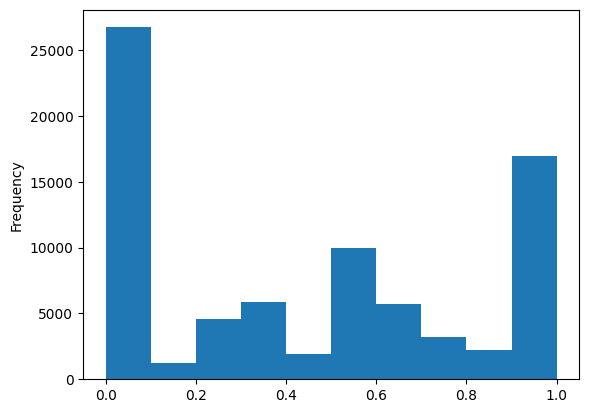

In [30]:
#Считаем процент русских слов в тегах и строим график
new_data['russian_tag'].apply(lambda x: sum(x)/len(x)).plot(kind='hist')

In [32]:
#Выбросим столбец где менее 30% русских слов
new_data_3w = new_data[new_data['russian_tag'].apply(lambda x: sum(x)/len(x) > 0.3)]

#Почистим от нерусских слов
new_data_3w['tag'] = new_data_3w['tag'].apply(lambda x: [i for i in x if re.match(r'[а-яё]+$', str(i))])
new_data_3w

C:\Users\stepa\AppData\Local\Temp\ipykernel_5668\4068251643.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_3w['tag'] = new_data_3w['tag'].apply(lambda x: [i for i in x if re.match(r'[а-яё]+$', str(i))])


,post_id,tag,text,russian_tag
0,1,"[хабрахаб, чаво, механизм, движок]",[Привет!\n\nДля сборника ответов на Часто Зада...,"[1, 0, 0, 1, 1, 1]"
1,2,"[ошибки, баги]","[Кроме неработающих и отсутствующих страниц, о...","[1, 1, 0, 0, 0]"
4,6,"[хабрахабр, подкасты, контент, тексты]",[Мы планируем добавить в раздел «тексты» возмо...,"[1, 1, 0, 1, 1]"
5,7,[логин],"[У меня такое ощущение, что logout время от вр...","[1, 0]"
7,9,[удаление],[Ну и может быть редактирование постов?\nВ при...,[1]
...,...,...,...,...
232084,500306,"[росгвардия, карантин, беспилотники]",[\n\nВ период майских праздников в рамках обес...,"[1, 1, 1]"
232085,500308,"[ивенты, конференции, митапы, конференция, мит...",[Подборка мероприятий на неделю\n\n\n\n#StayHo...,"[1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1]"
232087,500312,"[программирование, разработка, заметки, задачи]","[\n\nДоброго времени суток, друзья!\n\nСегодня...","[0, 1, 1, 0, 1, 0, 1, 0, 0]"
232099,500338,"[философия, дзен]","[Привет, Хабр! Представляю вашему вниманию пер...","[1, 1]"


In [33]:
#Дропнеем столбец russian_tag
new_data_3w = new_data_3w.drop('russian_tag', axis=1)


In [35]:
#Возьмем небольщой кусок данных и проверим какой процент тегов встречсется в тексте в качестве отдельного слова

#Возьмем 1000 строк
new_data_3w_1000 = new_data_3w[:1000]

#Создадим столбец в котором будем хранить для каждого списка тегов, какой процент тегов встречается в тексте в качестве отдельного слова
new_data_3w_1000['tag_in_text'] = new_data_3w_1000.apply(lambda x: sum([str(i) in str(x['text']).lower().split() for i in x['tag']])/len(x['tag']), axis=1)

C:\Users\stepa\AppData\Local\Temp\ipykernel_5668\504611270.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_3w_1000['tag_in_text'] = new_data_3w_1000.apply(lambda x: sum([str(i) in str(x['text']).lower().split() for i in x['tag']])/len(x['tag']), axis=1)


In [49]:
data_to_csv = new_data_3w.drop("post_id", axis=1)

#Возьмем только 1 текст из поля text
data_to_csv['text'] = data_to_csv['text'].apply(lambda x: x[0])


In [53]:
#Посчитаем среднюю длину текста
data_to_csv['text_len'] = data_to_csv['text'].apply(lambda x: len(str(x).split()))


In [58]:
#Средгнее значение длины текста
data_to_csv['text_len'].mean()

681.7160833060735

In [59]:
#Среднее значение длины текста в исходной таблице
data_union['text'].apply(lambda x: len(str(x).split())).mean()

4399.496435141108

In [60]:
data_to_csv.iloc[0]['text']

'Привет!\n\nДля сборника ответов на Часто Задаваемые Вопросы мы решили использовать идею wiki, поскольку, как нам кажется, нет смысла писать одному конкретному человеку FAQ для такого сайта, как Хабрахабр. Все равно останутся люди, у которых останутся вопросы.\nПосему, обращаюсь к читателям группы со следующим вопросом: какой wiki-движок из доступных, по-вашему, идеально подходит для составления «коллективного» ЧАВО по сайту?\n'

In [61]:
data_to_csv.to_csv('./Project/new_data.csv', index=False)

In [62]:
data_to_csv

,tag,text,text_len
0,"[хабрахаб, чаво, механизм, движок]",Привет!\n\nДля сборника ответов на Часто Задав...,58
1,"[ошибки, баги]","Кроме неработающих и отсутствующих страниц, о ...",35
4,"[хабрахабр, подкасты, контент, тексты]",Мы планируем добавить в раздел «тексты» возмож...,48
5,[логин],"У меня такое ощущение, что logout время от вре...",29
7,[удаление],Ну и может быть редактирование постов?\nВ прин...,25
...,...,...,...
232084,"[росгвардия, карантин, беспилотники]",\n\nВ период майских праздников в рамках обесп...,620
232085,"[ивенты, конференции, митапы, конференция, мит...",Подборка мероприятий на неделю\n\n\n\n#StayHom...,109
232087,"[программирование, разработка, заметки, задачи]","\n\nДоброго времени суток, друзья!\n\nСегодня ...",1539
232099,"[философия, дзен]","Привет, Хабр! Представляю вашему вниманию пере...",4418
